# Cross-Validation und Hyperparameter-Tuning

## Darstellung der Daten

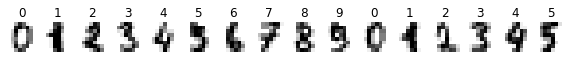

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=16, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

## Beispiel: Cross-Validation

In [9]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np

# flatten the images
data = digits.images.reshape((len(digits.images), -1))

# Erstellen des Support Vector Classifiers
clf = svm.SVC(gamma=0.001)

# 5-fold Cross-Validation
cv_score = cross_val_score(clf, data, digits.target, cv=5)

# Auswertung
print("CV-Score: {}".format(cv_score))
print("Mittelwert: {}".format(np.mean(cv_score)))

CV-Sore: [0.975      0.95       0.98328691 0.99164345 0.96100279]
Mittelwert: 0.9721866295264624


## Beispiel: Hyperparametertuning mit GridSearchCV und SVC

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Umformen der Daten
data = digits.images.reshape((len(digits.images), -1))

# Create a classifier: a support vector classifier
svc = SVC()

# Setup the hyperparameter grid
gamma_space = np.linspace(0.0005, 0.002, 10)
param_grid = {'gamma': gamma_space}

svc_cv = GridSearchCV(svc, param_grid, cv=5)

# Learn the digits on the train subset
svc_cv.fit(data, digits.target)

# Print the tuned parameters and score
print("Best Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_cv.best_score_))

Best Parameters: {'gamma': 0.001}
Best score is 0.9721866295264624


## Übungsaufgabe Hyperparameteroptimierung

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [1]:
# Import der Module
import numpy as np

from scipy.stats import randint

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Umformen der Daten
digits = datasets.load_digits()
data = digits.images.reshape((len(digits.images), -1))

# Erstellen des KNeighborsClassifier Classifiers
clf = KNeighborsClassifier()

# Setup der Hyperparameter
params = {
    'n_neighbors': randint(1, 30),
    'leaf_size': randint(1, 50),
    'p': [1, 2]
}

# Erstellen der Suche
clf_cv = RandomizedSearchCV(clf, params, cv=5)

# Ausführen der Suche
clf_cv.fit(data, digits.target)

# Ausgabe der Ergebnisse
print("Best Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Best Parameters: {'leaf_size': 2, 'n_neighbors': 1, 'p': 2}
Best score is 0.9643933766635715
